**Google Play Store Data Analysis - Giriraju**

Import Dataset from csv

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/googleplaystore.csv')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Finding missing values in the dataset

In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

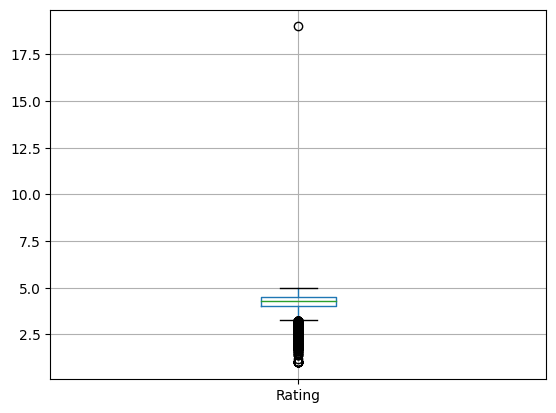

In [ ]:
df.boxplot();

See , there is one outlier and it's beyond 17.5 . Ratings of Google play Store apps will be 0 to 5 only, So we should remove that row.

**Checking the number of outliers**

In [ ]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop([10472], inplace=True)

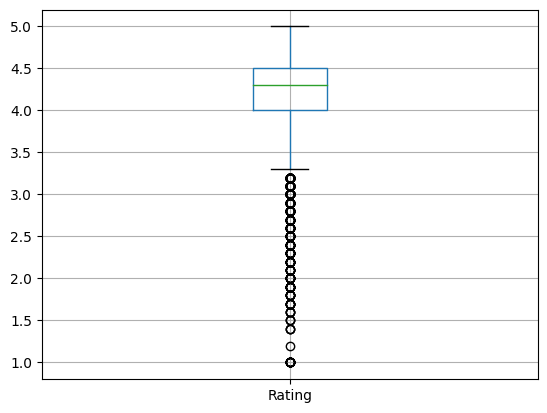

In [ ]:
df.boxplot();

Now that outlier has been removed !!

**Now , Imputing the missing values in the Rating column**

In [ ]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [ ]:
Total_apps=df['App'].count()
print("The Total app counts are : ",Total_apps)

The Total app counts are :  10840


**DATA VISUALIZATION**

1.Distribution of App Categories:

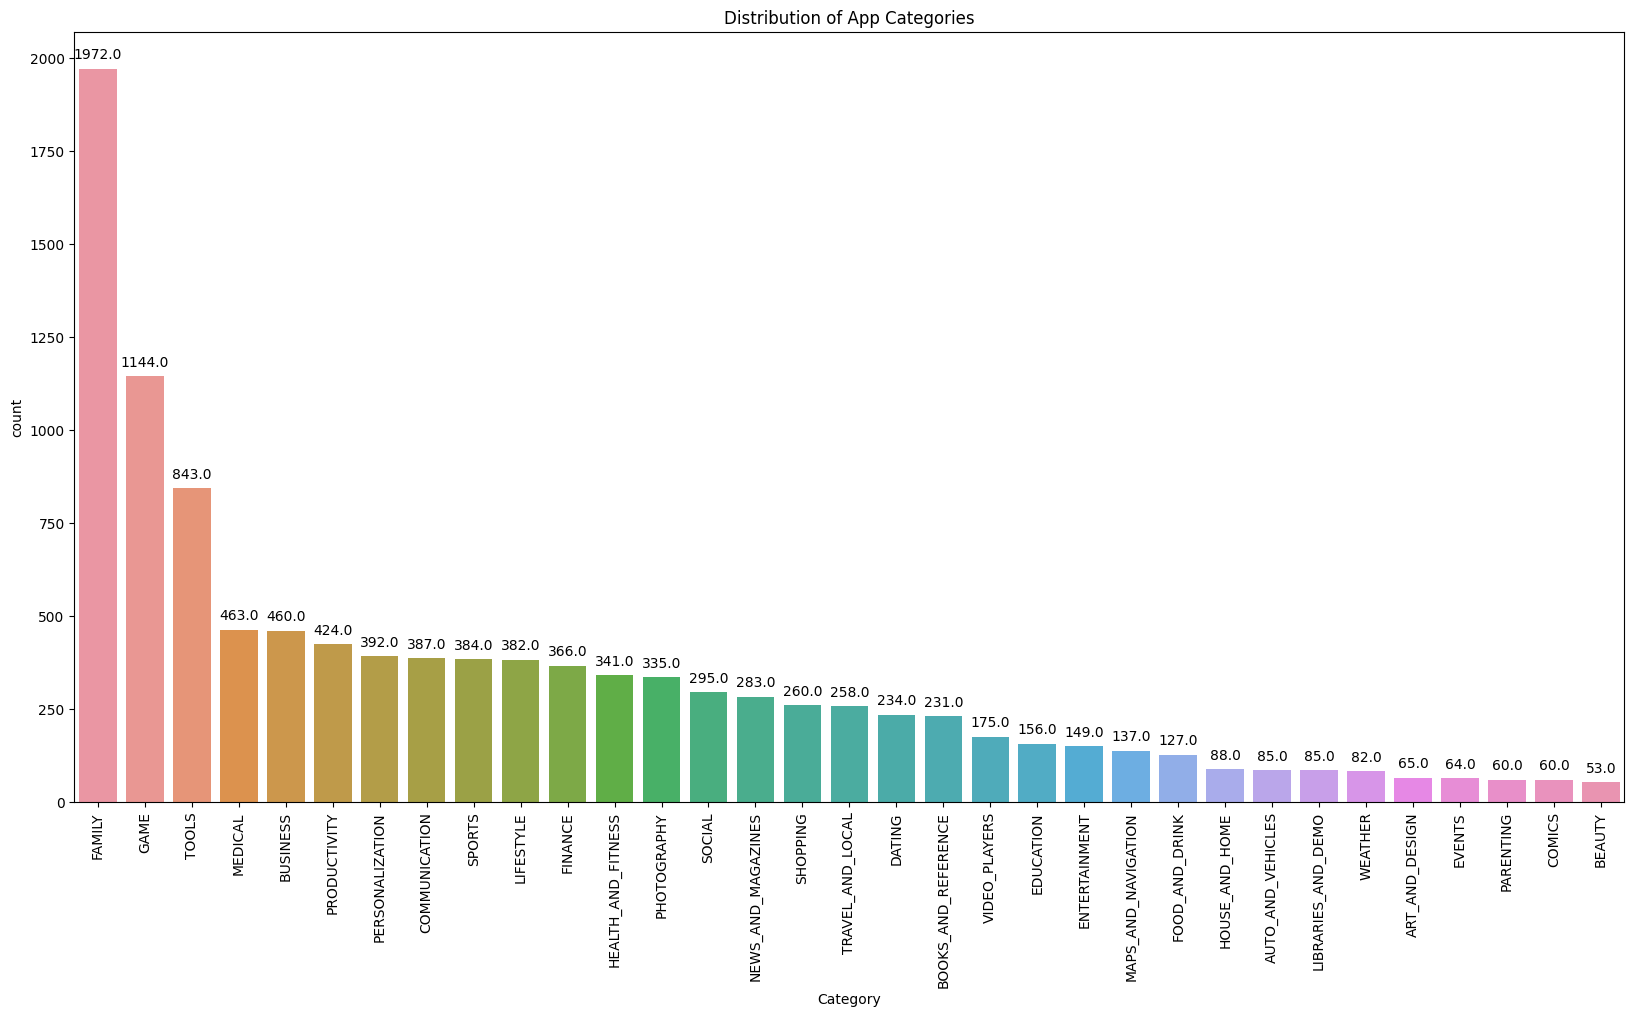

In [106]:
category_order = df['Category'].value_counts().index


plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Category', data=df, order=category_order)

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of App Categories')
plt.show()

2.Average Ratings by Category:

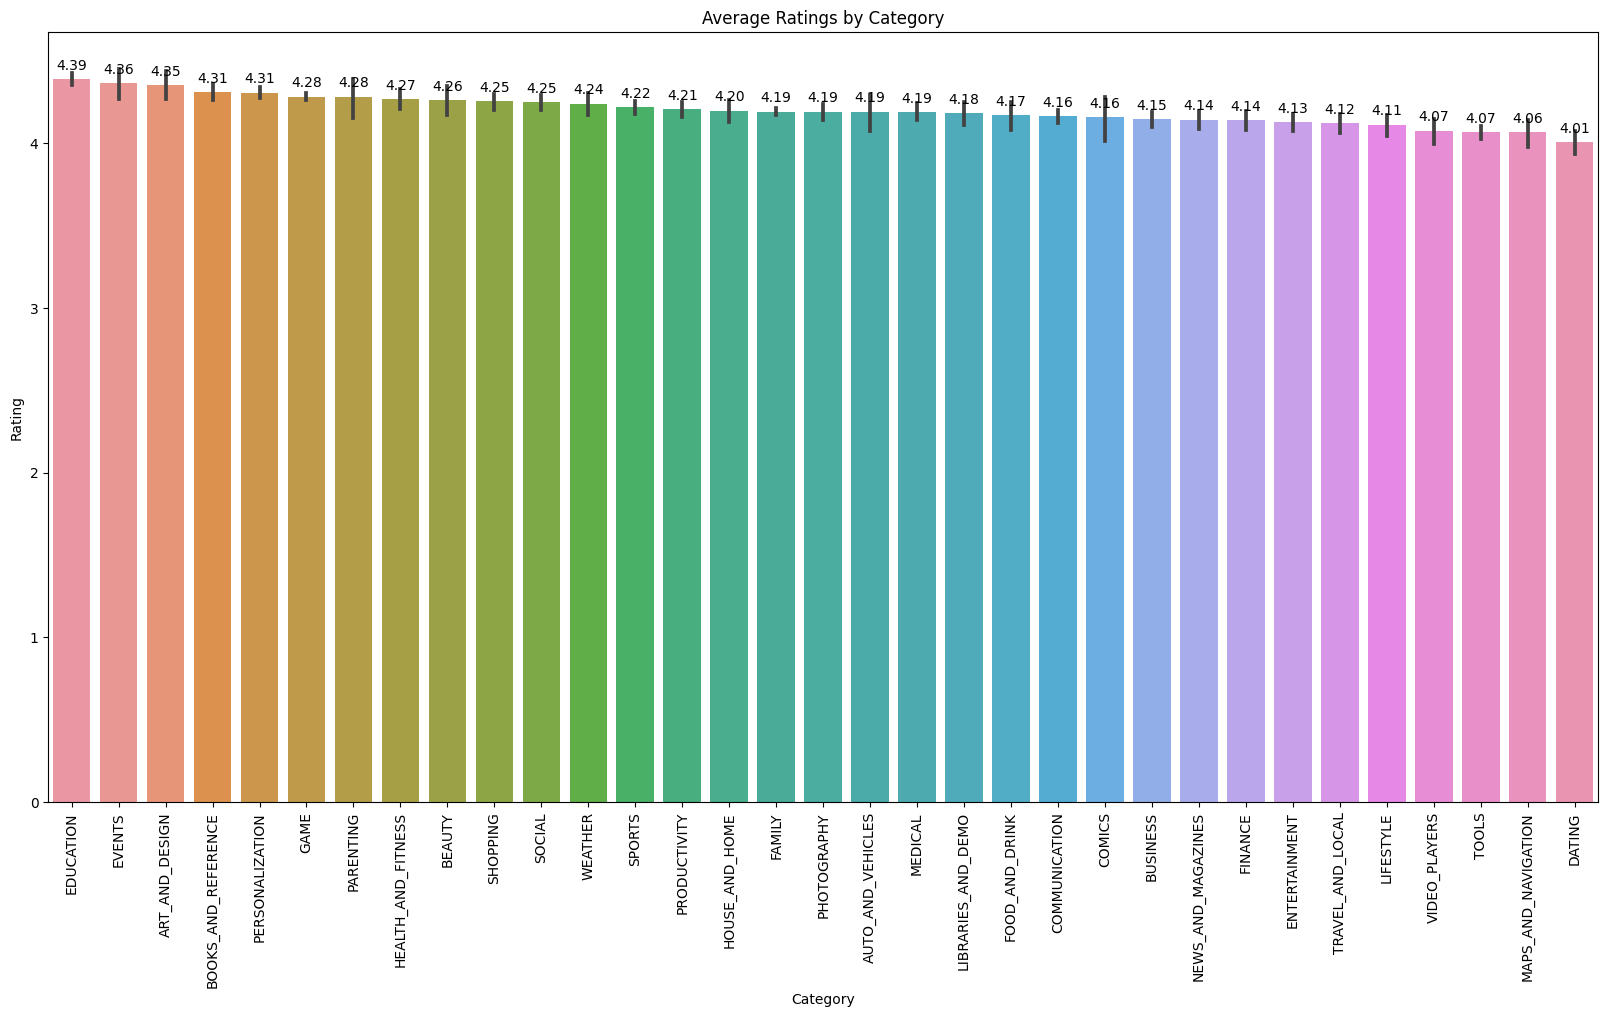

In [105]:
avg_ratings_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
category_order = avg_ratings_by_category.index


plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Category', y='Rating', data=df, order=category_order)


plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Average Ratings by Category')
plt.show()

3.App Types Distribution:

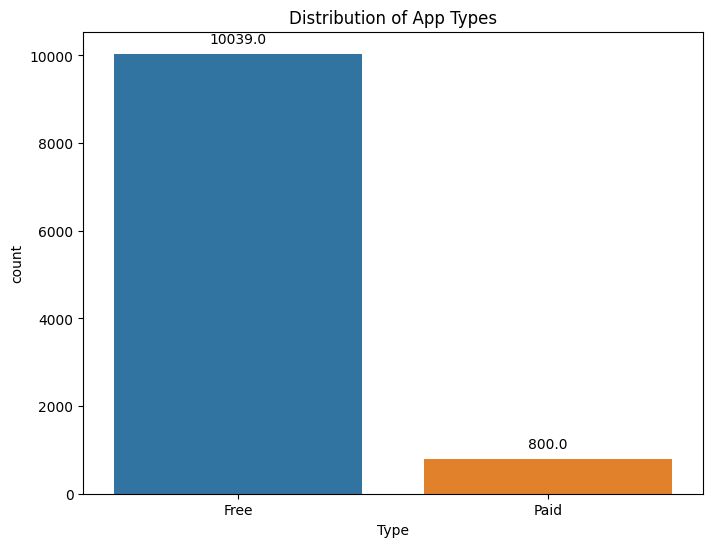

In [ ]:
type_order = df['Type'].value_counts().index


plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Type', data=df, order=type_order)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of App Types')
plt.show()

4.Top 10 Genres with the Most Installs:

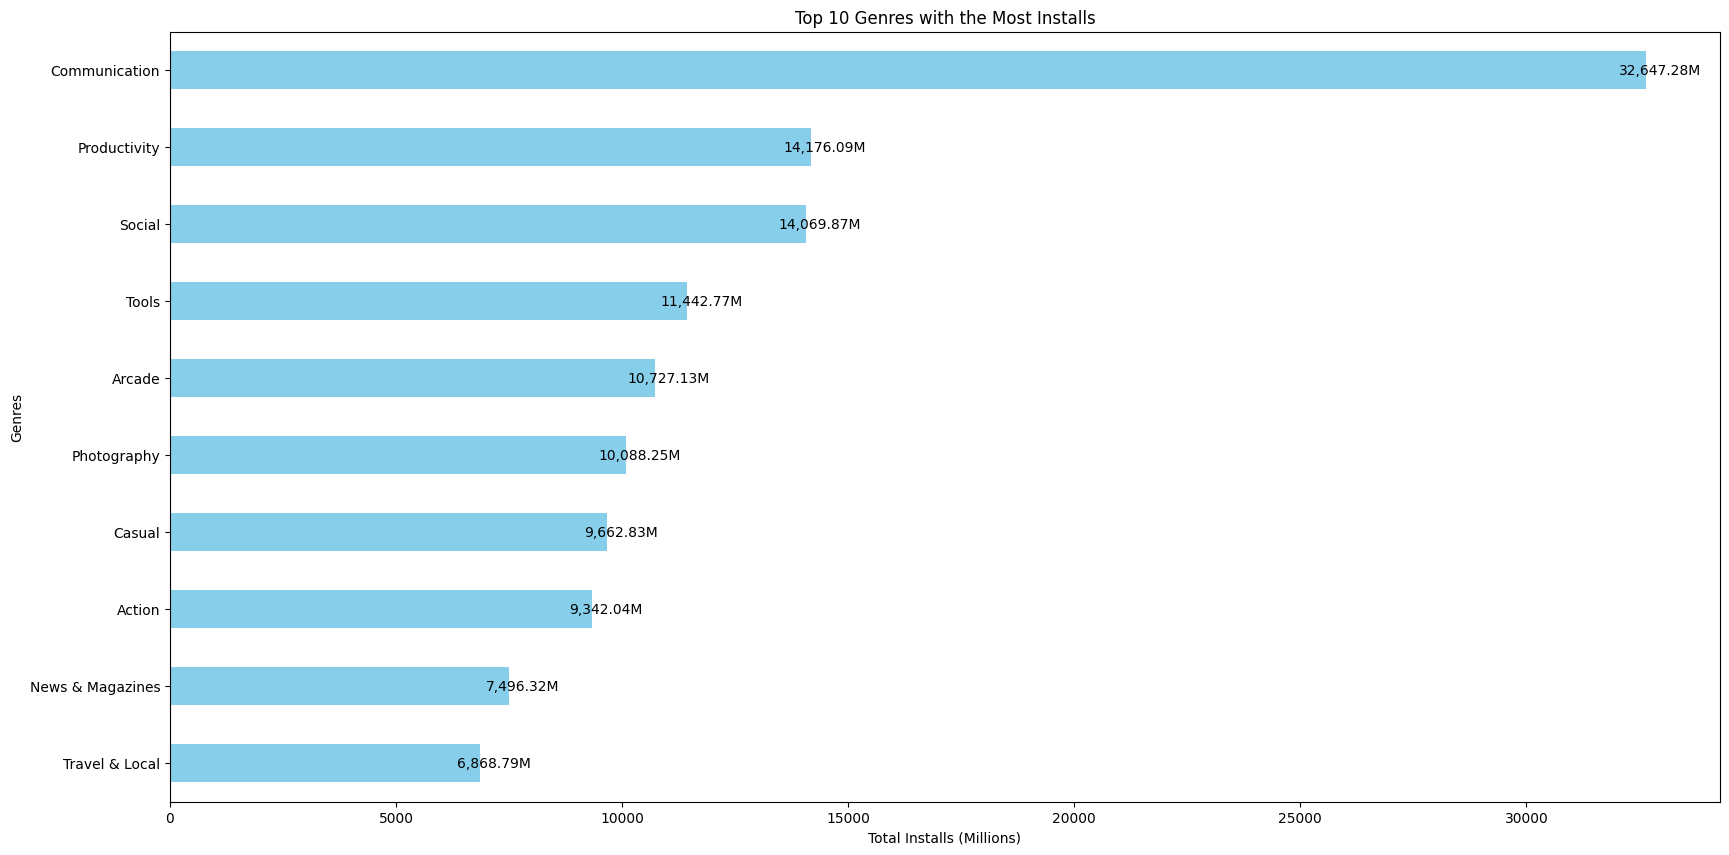

In [107]:
if not pd.api.types.is_numeric_dtype(df['Installs']):
    df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


top_genres = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)


top_genres = top_genres / 1e6


plt.figure(figsize=(20, 10))
ax = top_genres.sort_values().plot(kind='barh', color='skyblue')


for p in ax.patches:
    ax.annotate(f'{p.get_width():,.2f}M', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

plt.title('Top 10 Genres with the Most Installs')
plt.xlabel('Total Installs (Millions)')
plt.ylabel('Genres')
plt.show()

5.Correlation between Size and Rating:

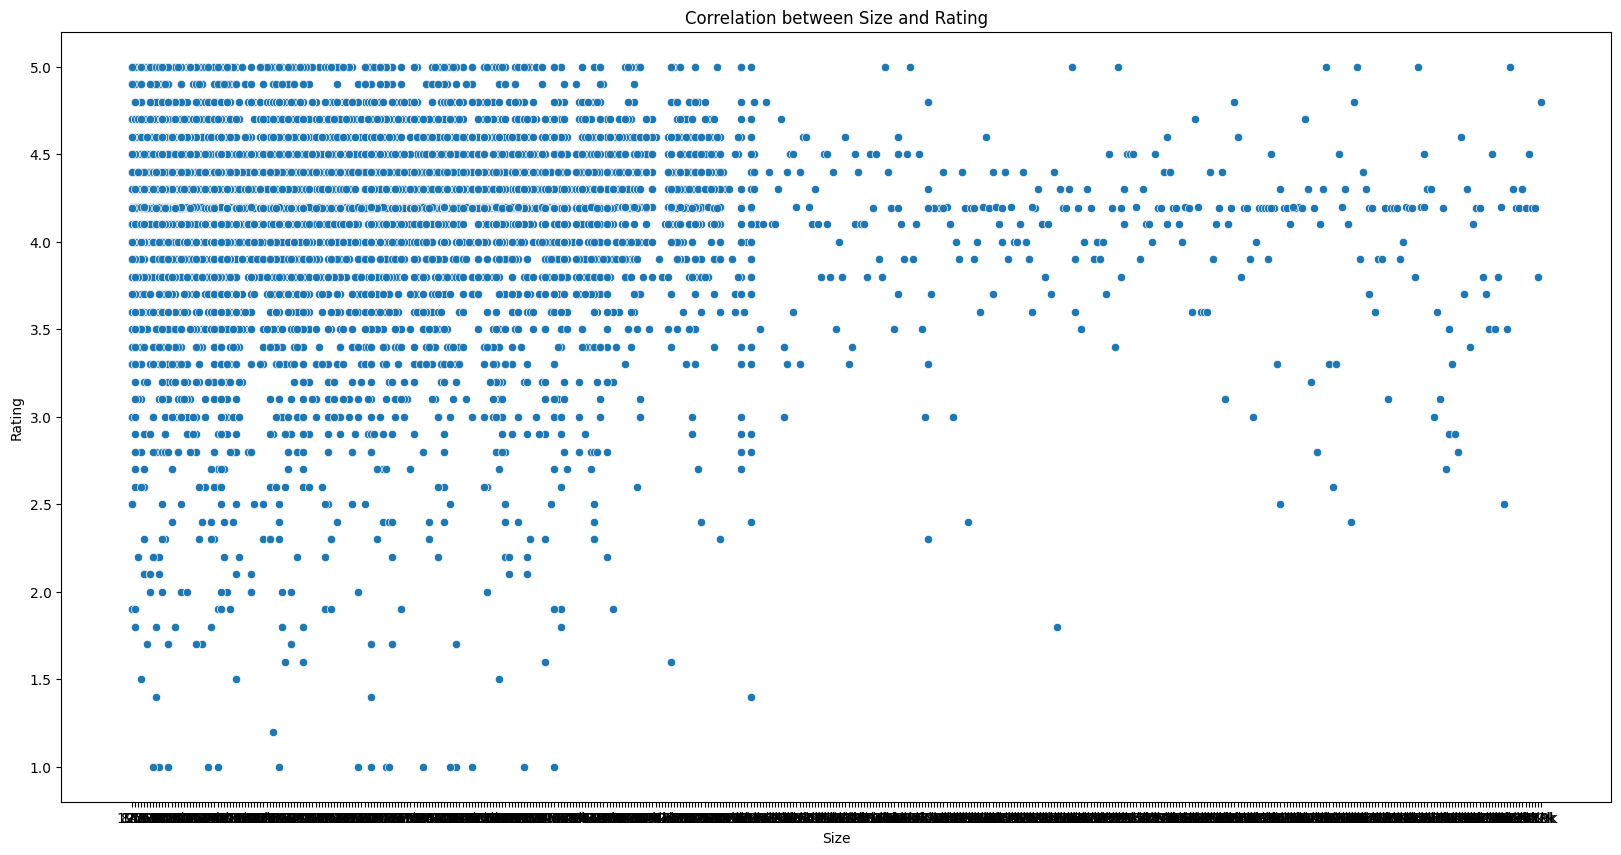

In [108]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title('Correlation between Size and Rating')
plt.show()

6.Content Rating Distribution:

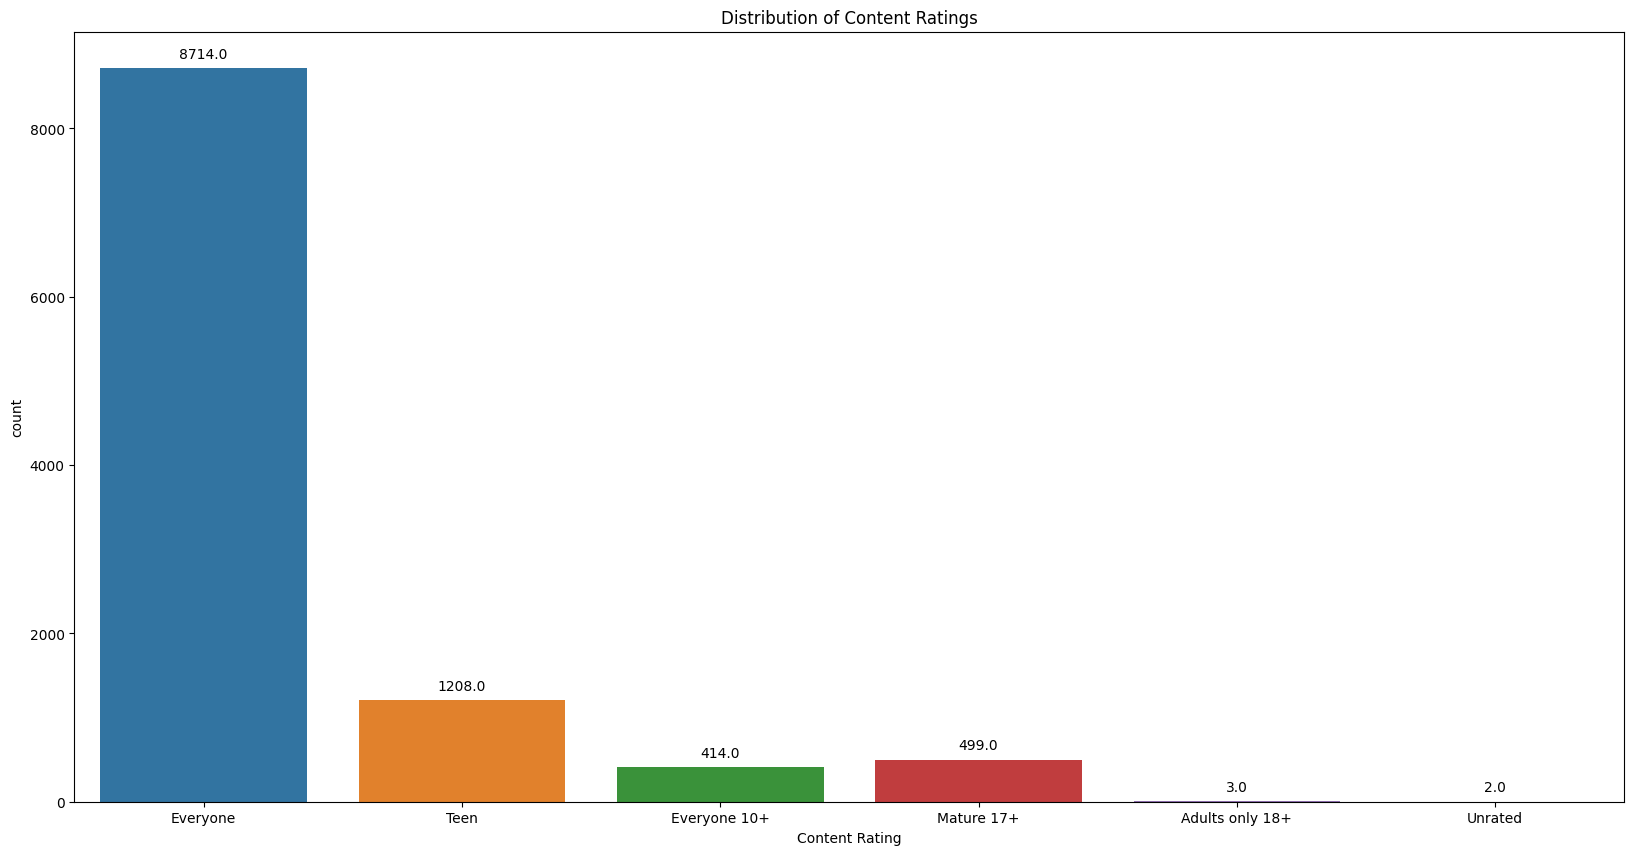

In [109]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Content Rating', data=df)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Content Ratings')
plt.show()

7.Price Distribution of Paid Apps:

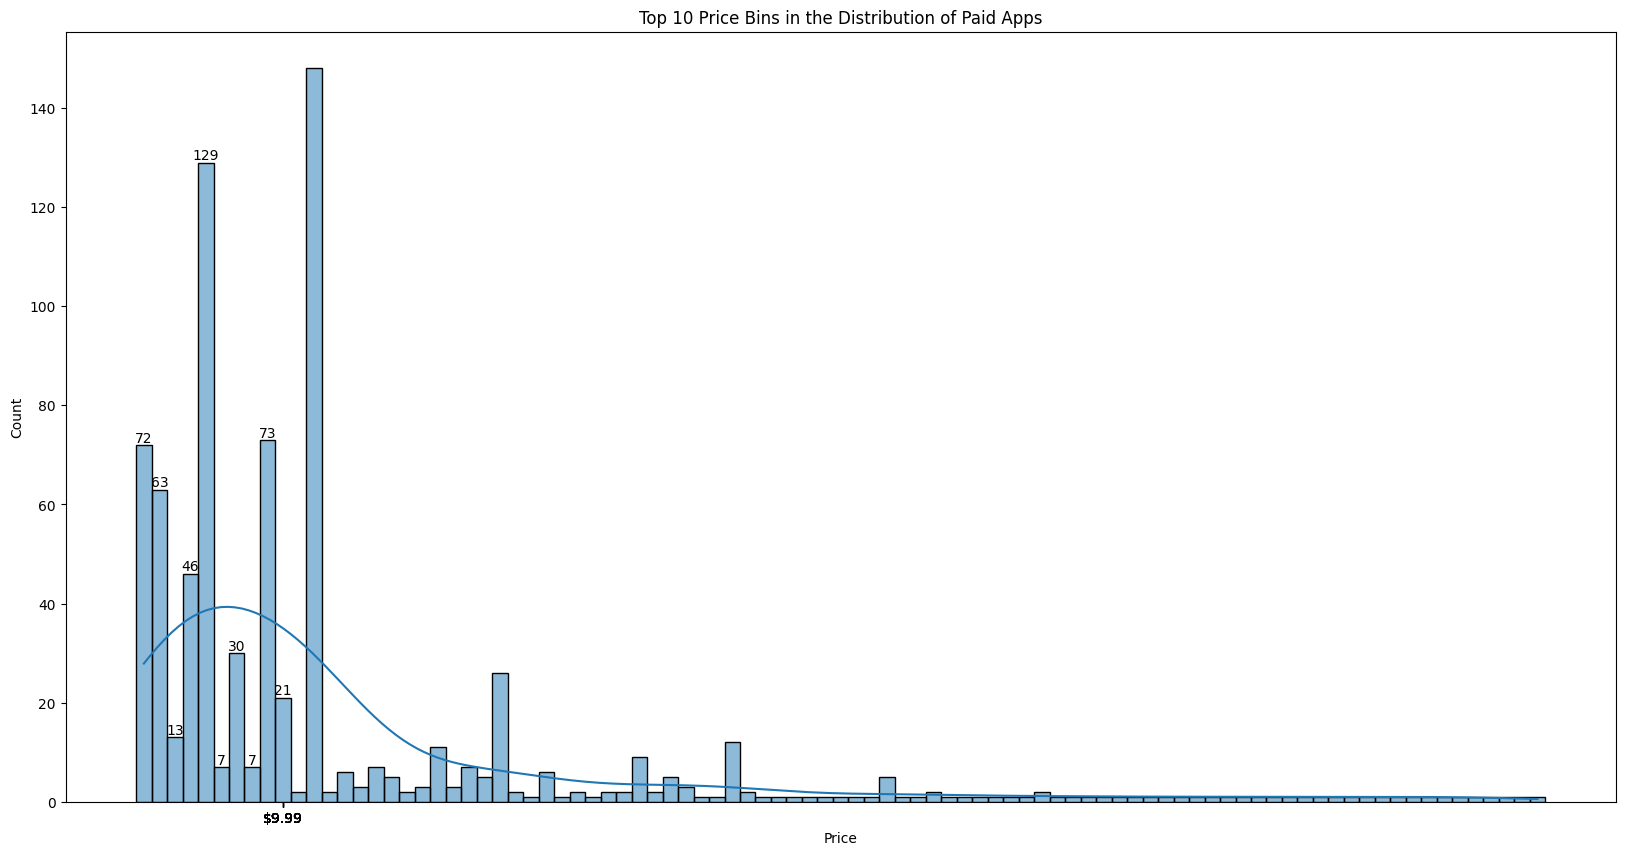

In [110]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(df[df['Type'] == 'Paid']['Price'], bins=20, kde=True)


sorted_prices = sorted(df[df['Type'] == 'Paid']['Price'], reverse=True)

for p, value in zip(ax.patches[:10], sorted_prices[:10]):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height, f'{int(height)}', ha="center", va="bottom")


plt.xticks(sorted_prices[:10])

plt.title('Top 10 Price Bins in the Distribution of Paid Apps')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

8.Top 10 Apps with the Highest Reviews:

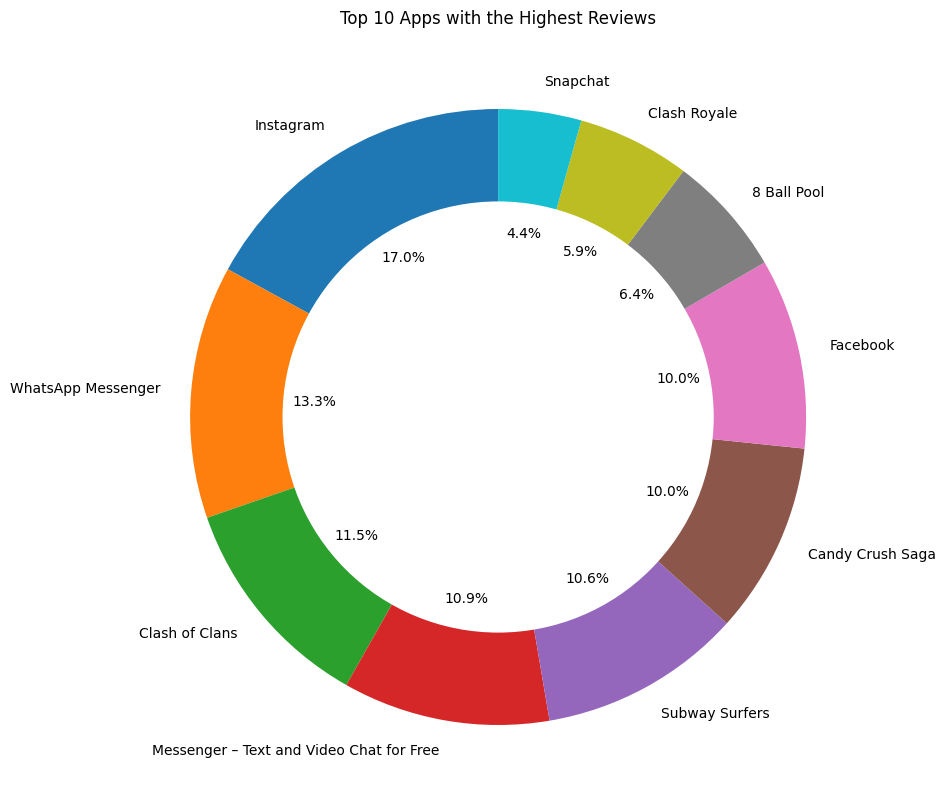

In [111]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


aggregated_reviews = df.groupby('App')['Reviews'].sum().reset_index()


top_reviews = aggregated_reviews.nlargest(10, 'Reviews')


plt.figure(figsize=(20, 10))
plt.pie(top_reviews['Reviews'], labels=top_reviews['App'], autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 10 Apps with the Highest Reviews')
plt.show()

9.Apps Distribution Based on Android Version:

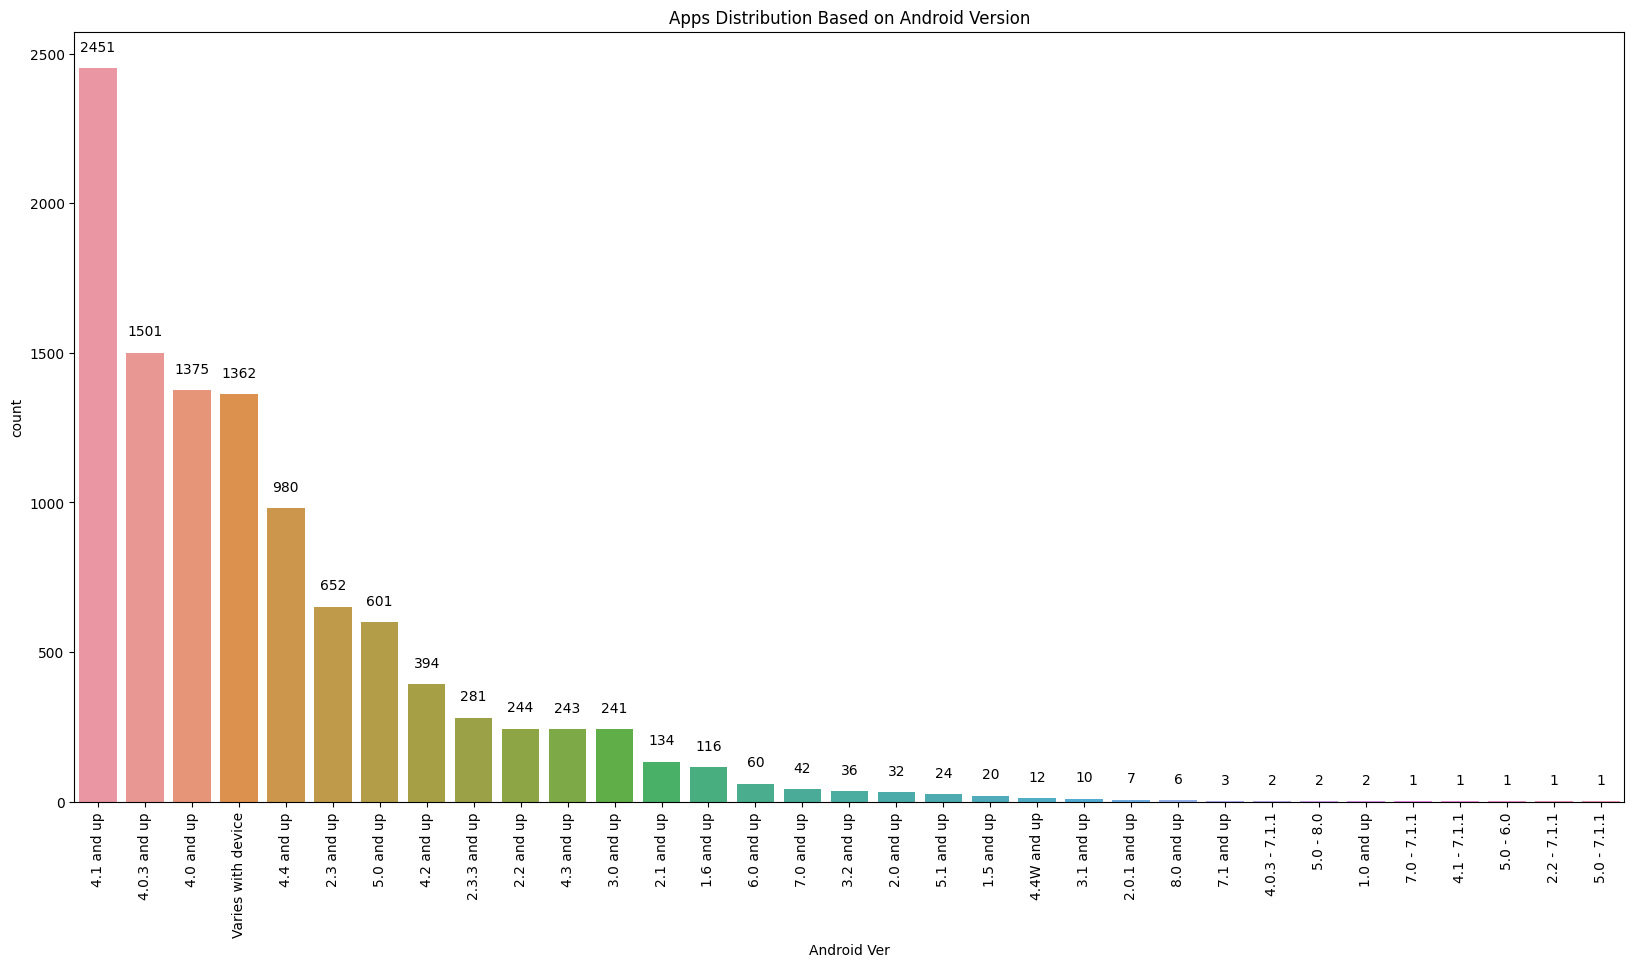

In [112]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Android Ver', data=df, order=df['Android Ver'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Apps Distribution Based on Android Version')
plt.show()

10.Proportion of Free and Paid Apps in Each Category:

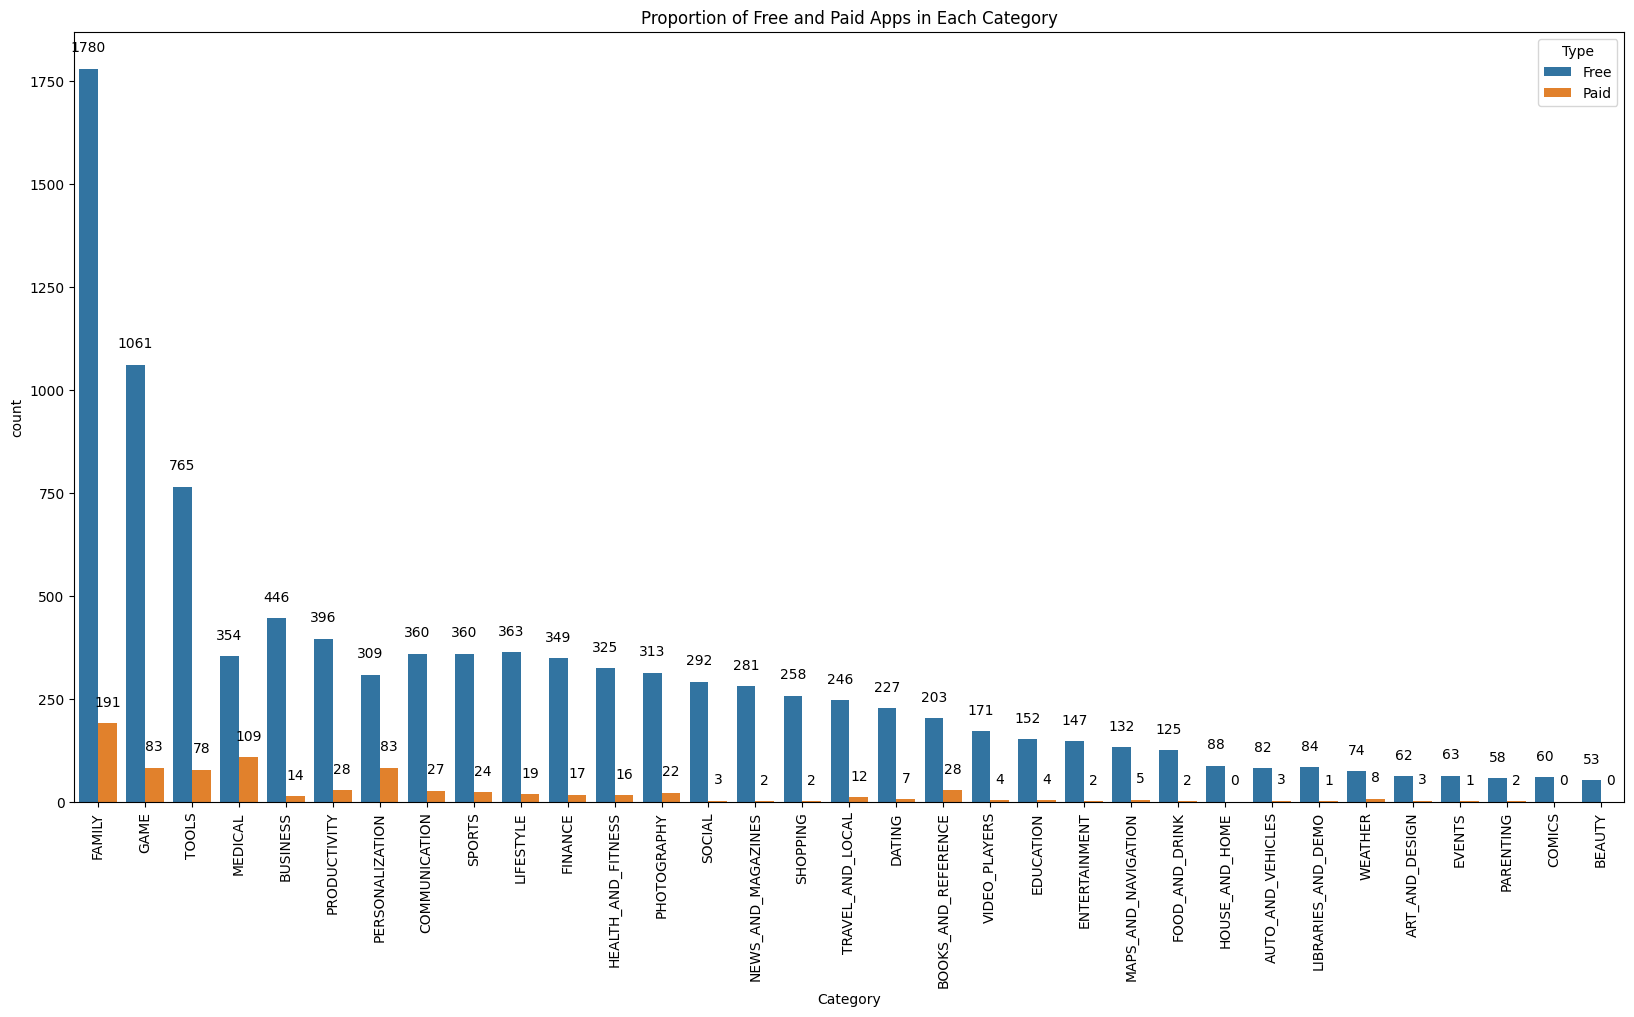

In [113]:
category_order = df['Category'].value_counts().index

plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Category', hue='Type', data=df, order=category_order)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=90)
plt.title('Proportion of Free and Paid Apps in Each Category')
plt.show()

                                                                                      **THANK YOU !!**